# Task-04: Twitter Sentiment Analysis using Twitter Entity Sentiment Dataset

This notebook performs data loading, cleaning, visualization, and sentiment classification on Twitter data to analyze public opinion using Natural Language Processing and machine learning techniques.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
df = pd.read_csv("twitter_training.csv", header=None)
df.columns = ['entity', 'entity_type', 'sentiment', 'content']
df.head()

,entity,entity_type,sentiment,content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
df.info()
df['sentiment'].value_counts()
df['entity_type'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   entity       74682 non-null  int64 
 1   entity_type  74682 non-null  object
 2   sentiment    74682 non-null  object
 3   content      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


entity_type
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)   

In [6]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = str(text)  # ensure it's a string
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-zA-Z]", " ", text)  # remove non-letters
    text = text.lower()
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return " ".join(words)

df['cleaned_content'] = df['content'].apply(clean_text)

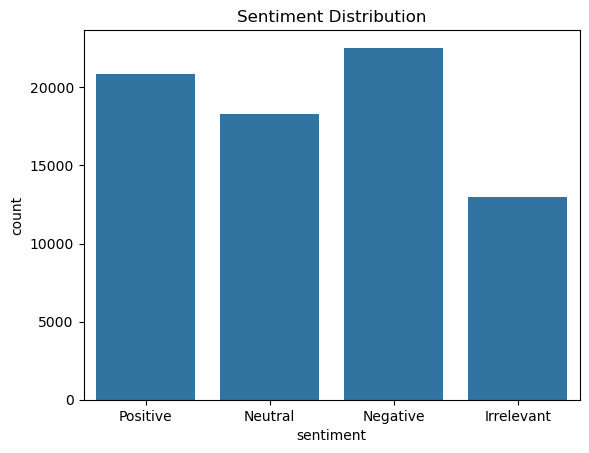

In [7]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

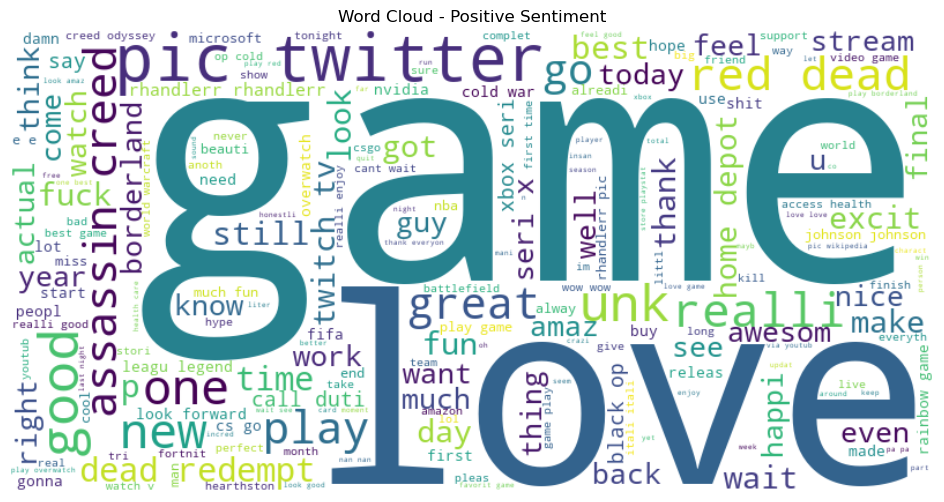

In [8]:
positive_words = ' '.join(df[df['sentiment'] == 'Positive']['cleaned_content'])
wc = WordCloud(width=800, height=400, background_color='white').generate(positive_words)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Positive Sentiment")
plt.show()

In [9]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_content']).toarray()
y = df['sentiment']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [11]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6451764075784964
Confusion Matrix:
 [[ 944  690  316  642]
 [  80 3644  329  466]
 [ 143  818 1951  684]
 [ 112  649  371 3098]]
Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.74      0.36      0.49      2592
    Negative       0.63      0.81      0.71      4519
     Neutral       0.66      0.54      0.59      3596
    Positive       0.63      0.73      0.68      4230

    accuracy                           0.65     14937
   macro avg       0.66      0.61      0.62     14937
weighted avg       0.66      0.65      0.63     14937



## ✅ Summary

- Performed sentiment analysis on Twitter data using Python.
- Cleaned and preprocessed text data using NLP techniques.
- Visualized sentiment distribution and generated word clouds.
- Built and evaluated a Naive Bayes classification model.
- Gained hands-on experience with TF-IDF vectorization and model evaluation metrics.